
#### Procesamiento Digital de Señales

# Trabajo Práctico 4
#### Nombre y Apellido
Tomas Ambrogi
***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase


   b) Corrobore su respuesta mediante la simulación computacional


In [23]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (7,7)

import matplotlib.pyplot as plt

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 25
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)


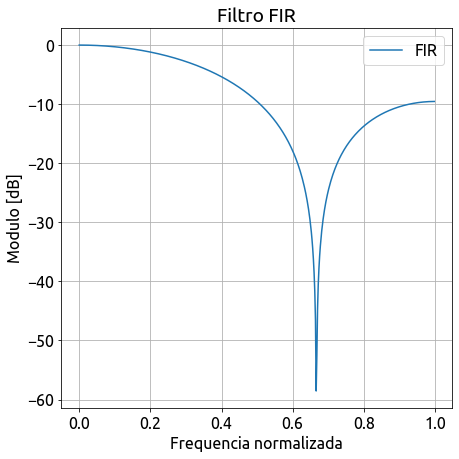

In [24]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

num = np.array([1, 1, 1])
den = np.array([3, 0, 0])

ww, hh = sig.freqz(num, den)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='FIR')

plt.title('Filtro FIR')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()


plt.show()


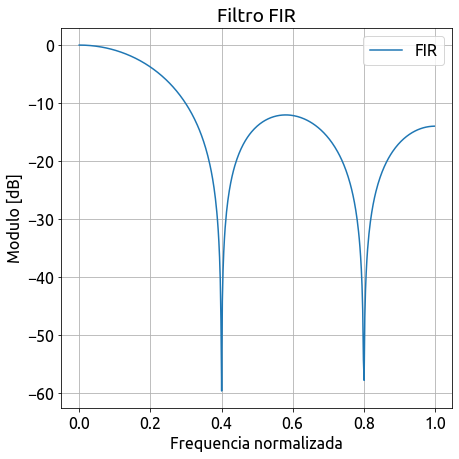

In [25]:
num = np.array([1, 1, 1, 1, 1])
den = np.array([5, 0, 0, 0, 0])

ww, hh = sig.freqz(num, den)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='FIR')

plt.title('Filtro FIR')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()


plt.show()


<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase


   b) Corrobore su respuesta mediante simulación computacional


In [26]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>



Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase


   b) Corrobore su respuesta mediante simulación computacional


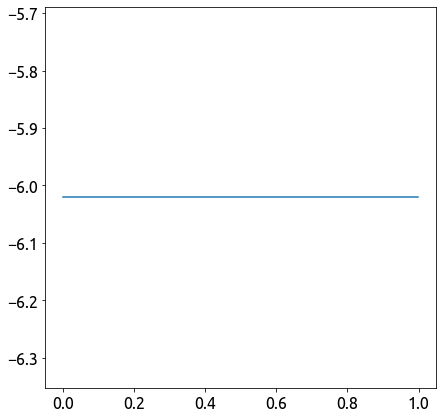

In [27]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N = 2
b = -1
a = [1, 0]

z, p, k = sig.tf2zpk(b/N,a)

ww, hh = sig.freqz_zpk(z, p, k)

ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='FIR')
plt.show()

<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [28]:
# Defina la plantilla del filtro

fs = 1000
fn = fs/2

fc0 = 1 # comienzo de la banda de paso
fs0 = fc0 * 0.01 # fin de la banda de detenida 0

fc1 = 40 # fin de la banda de paso
fs1 = fc1 * 1.01 # comienzo de la banda de detenida 1

gpass = 0.1
gstop = 60

wp = [fc0, fc1]
ws = [fs0, fs1]

wp_n = [fc0/fn, fc1/fn]
ws_n = [fs0/fn, fs1/fn]

print(wp, ws)

# Segmentos de interés #
########################
# Puede tomar como referencia los siguientes segmentos, aunque si lo considera, también
# puede incluir otros que considere importantes para evaluar el rendimiento.

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )


inf = int(zonas_con_interf_baja_frec[0][0])
sup = int(zonas_con_interf_baja_frec[0][1])

[1, 40] [0.01, 40.4]


b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

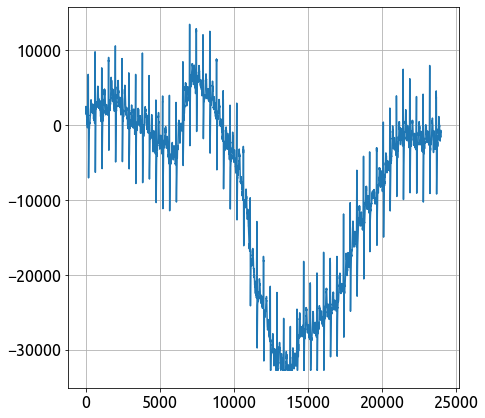

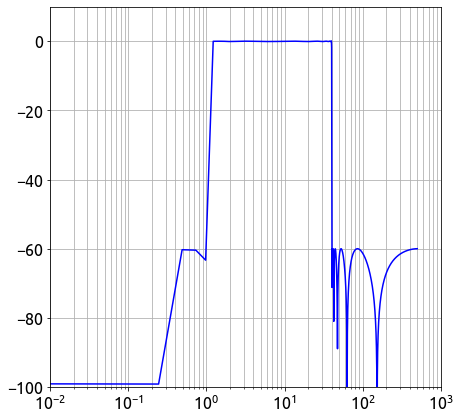

In [29]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

import scipy.io as sio

mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

plt.figure(1)
plt.plot(ecg_one_lead[inf:sup])
plt.grid()
plt.show()

#----------------------------
# Filter design
#----------------------------

# Creo el filtro en funcion a las especificaciones
sos = sig.iirdesign(wp_n, ws_n, gpass, gstop, output='sos')

#sos = sig.iirfilter(175, Wn=3, btype='highpass', ftype='butter', fs=1000, output='sos')

# Creo un vector lineal en las frecuencias de interes
ww = np.linspace(0.01, 1000)

w, h = sig.sosfreqz(sos, worN=2048, fs=1000)



#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

plt.semilogx(w, 20 * np.log10(abs(h)), 'b')
plt.axis((0.01, 1000, -100, 10))
plt.grid(which='both', axis='both')


plt.show()

d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



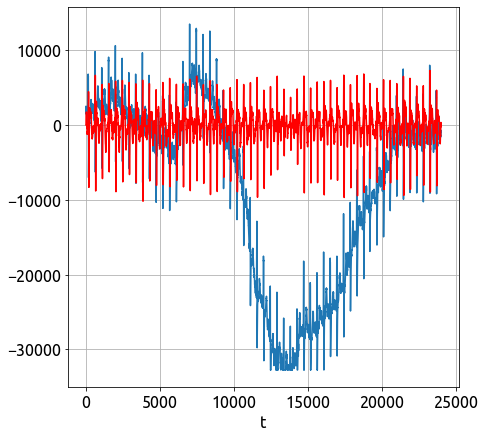

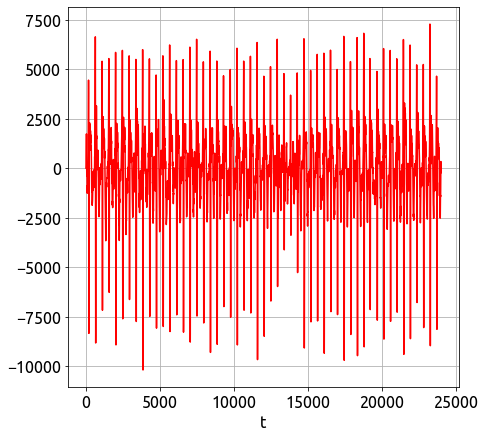

In [30]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

filtered = sig.sosfilt(sos, ecg_one_lead[inf:sup], axis=0)

plt.figure(1)
# Plot the original signal.
plt.plot(ecg_one_lead[inf:sup])
# Plot the filtered signal, shifted to compensate for the phase delay.
plt.plot(filtered, 'r-')

plt.xlabel('t')
plt.grid(True)

plt.show()

plt.figure(2)
# Plot the filtered signal, shifted to compensate for the phase delay.

plt.plot(filtered, 'r-')

plt.xlabel('t')
plt.grid(True)

plt.show()

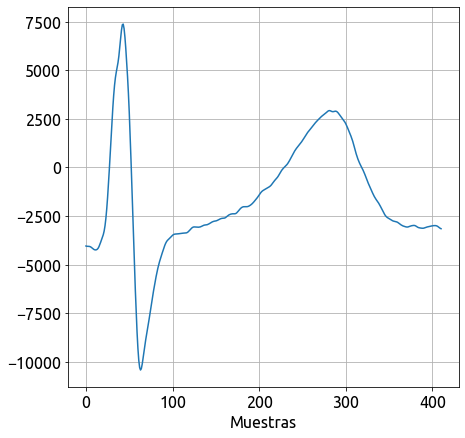

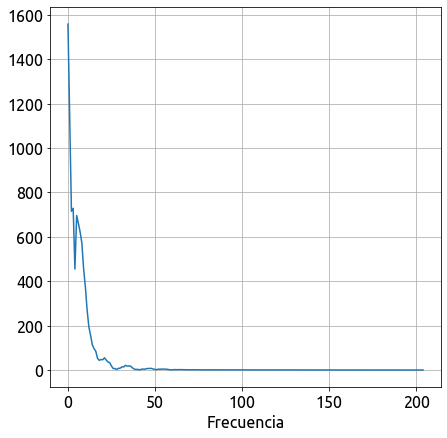

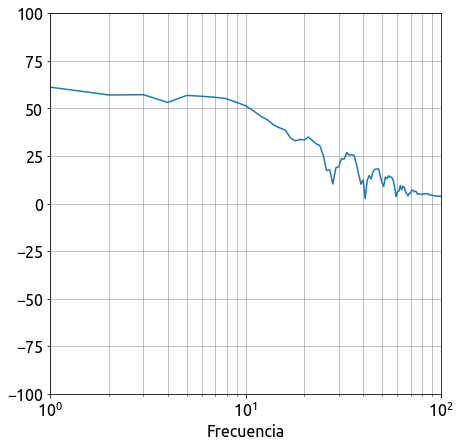

In [31]:
#####################################################
# Analisis Espectral del latido normal mediante FFT #
#####################################################

ecg_normal = vertical_flaten(mat_struct['heartbeat_pattern1'])

N = len(ecg_normal)
df = fs/N


ff = np.linspace(0, (N/2)*df, N/2).flatten()

S = np.fft.fft(ecg_normal, axis=0)/N

plt.figure(1)
plt.xlabel('Muestras')
plt.plot(ecg_normal)
plt.grid()
#plt.show()

plt.figure(2)
plt.xlabel('Frecuencia')
plt.plot(abs(S[:int(N/2)]))
plt.grid(which='both', axis='both')
#plt.show()


plt.figure(3)
plt.xlabel('Frecuencia')
plt.semilogx(20* np.log10(abs(S[:int(N/2)])))
plt.axis((1, 100, -100, 100))
plt.grid(which='both', axis='both')
plt.show()


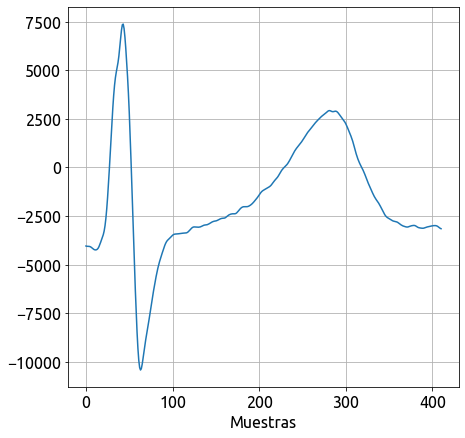

In [32]:
##################################################################################
# Analisis de la densidad espectral de potencia (Periodograma) del latido normal #
##################################################################################


ecg_normal = vertical_flaten(mat_struct['heartbeat_pattern1'])

f, Psd = sig.periodogram(ecg_normal, fs=fs, nfft=4096, axis=0)

plt.figure(1)
plt.xlabel('Muestras')
plt.plot(ecg_normal)
plt.grid()
plt.show()

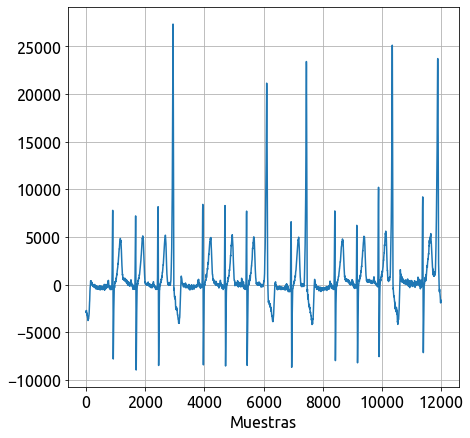

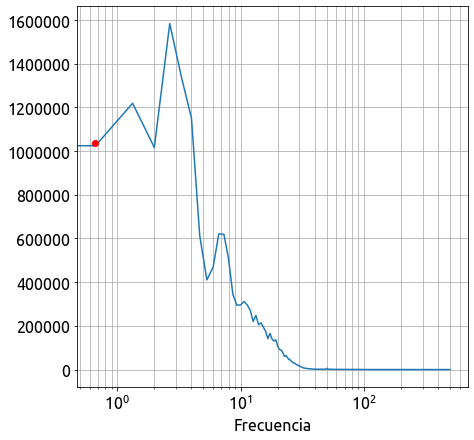

In [66]:
##################################################################################
# Analisis de la densidad espectral de potencia (Periodoframa) del latido normal #
##################################################################################

inf = int(zonas_sin_interf[0][0])
sup = int(zonas_sin_interf[0][1])
N = sup - inf

f_w, psd_w = sig.welch(ecg_one_lead[inf:sup], fs=fs, nperseg=N/8, axis=0)

plt.figure(1)
plt.xlabel('Muestras')
plt.plot(ecg_one_lead[inf:sup])
plt.grid()
plt.show()

plt.figure(2)
plt.xlabel('Frecuencia')
plt.semilogx(f_w, psd_w)
#plt.scatter([1], [1])
plt.plot(0.66, 1035000, "or")
plt.plot(0.66, 1035000, "or")
plt.grid(which='both', axis='both')
plt.show()


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

In [34]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

In [35]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

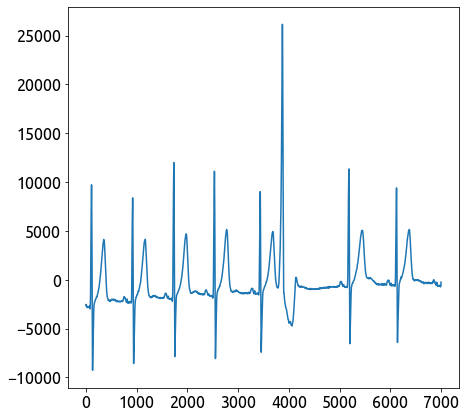

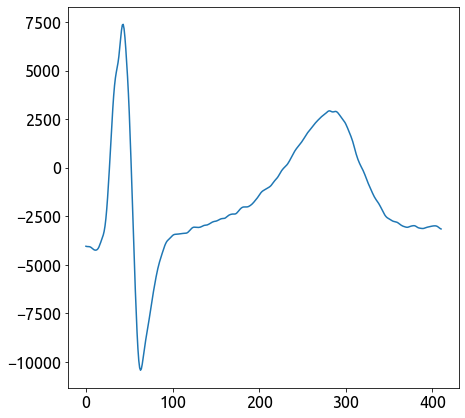

In [36]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [37]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

